### Test1

In [1]:
# import libraries
import json                        

import os                                     
import sys                                     
sys.path.append(os.path.join( '..'))          #call the other modules as a package and use the import option. You need the other two line above.

from eira import EIRA_GIS_tools
from eira import EIRA_NotebookUserInter
from eira import EIRA_files_handler
from eira import EIRA_hazards
from eira import EIRA_risk_tools_level1
from eira import EIRA_utils
from eira.EIRA_utils import load_config

import rasterio

import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import time

/root/WB/EIRA_tool/EIRA/eira/EIRA_Config.json
/root/WB/EIRA_tool/EIRA/eira/EIRA_Config.json


Dropdown(description='Select:', options=('Aruba', 'Antigua', 'Barbuda', 'Afghanistan', 'Angola', 'Anguilla', '…

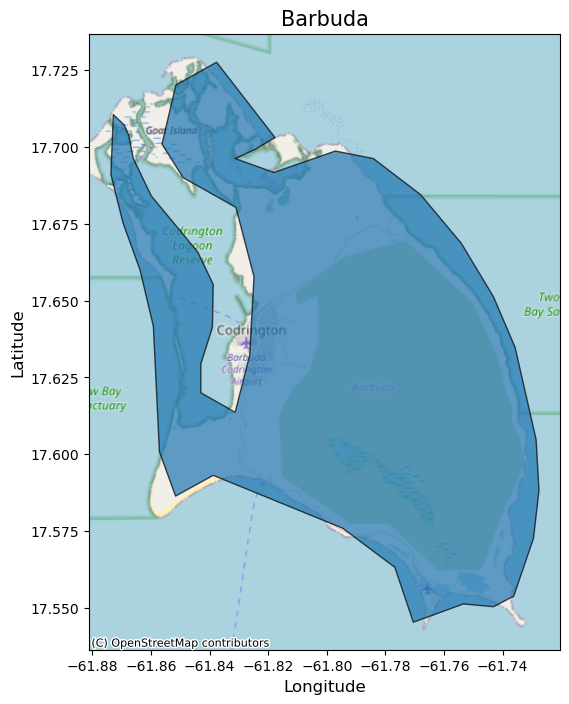

In [ ]:
dropdown = EIRA_NotebookUserInter.create_dropdown()
gdf_shape_referential_funtion = EIRA_NotebookUserInter.check_if_selection_changed_return_country_gdf(dropdown, 'Country selected: ')
selected_country_name = EIRA_NotebookUserInter.check_if_selection_changed_return_country_name(dropdown,'Country selected: ')

In [3]:
root_folder_path = os.path.abspath('Auxname.txt')
#root_folder_path = os.path.abspath(__file__)

#print(root_folder_path)

cofig_data = load_config()

/root/WB/EIRA_tool/EIRA/eira/EIRA_Config.json


Original CRS: EPSG:4326
The file is already in EPSG:4326 (EPSG:4326) CRS.


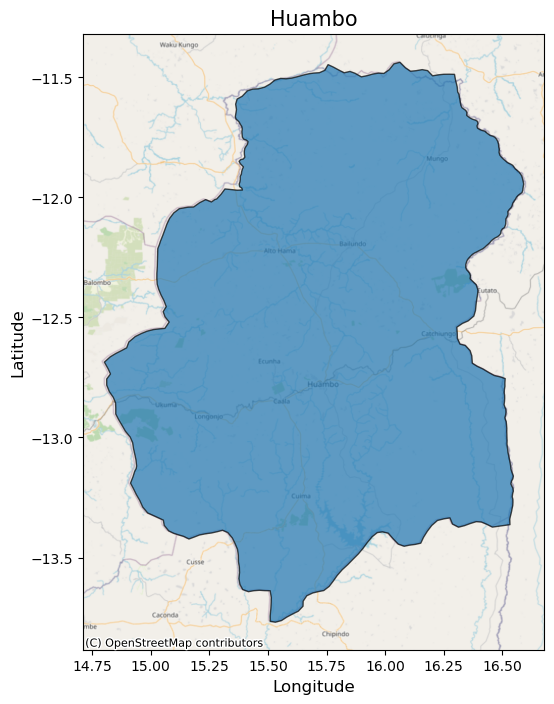

In [4]:

#File path of the referential map of the country or region under study
#shape_file_path_ref = '/root/WB/EIRA_tool/EIRA/eira/input_data/Angola/gadm41_AGO_shp/gadm41_AGO_0.shp'
shape_file_path_ref = '/root/WB/EIRA_tool/EIRA/eira/input_data/Angola/Huambo_shp/Huambo.shp'

#Plot
gdf_shape_referential = EIRA_GIS_tools.read_and_reproject_vector_file(shape_file_path_ref)
EIRA_GIS_tools.plot_vectorGIS_in_memory_plus_basemap(gdf_shape_referential, "Huambo",use_basemap=True)

In [5]:
#Models availables
Landsld = EIRA_hazards.Landslide()
models_list = list(Landsld.LANDSLIDE_HAZARD_MODELS_AVAILABLES.keys())
Landsld.print_hazard_models_available(models_list)

Initialized landslide class
Available Hazard Models:
- ARUP_WB_UNDRR_Global_landslide_hazard_Trigger_Earthquake_Precipitation_comb_2020
- GIRI Susceptibility Class of Landslides Triggered By Earthquakes
- GIRI Susceptibility Class of Landslides Triggered By Precipitation - Existing climate
- GIRI Susceptibility Class of Landslides Triggered By Precipitation - Lower bound
- GIRI Susceptibility Class of Landslides Triggered By Precipitation - Upper bound


In [13]:
#Select a Landslide hazard model to 
Selected_Landslide_model= 'ARUP_WB_UNDRR_Global_landslide_hazard_Trigger_Earthquake_Precipitation_comb_2020'

ARUP_WB_UNDRR_Global_landslide_hazard_Trigger_Earthquake_Precipitation_comb_2020.tif: 100%|██████████| 25.6M/25.6M [00:48<00:00, 522kB/s]


File 'ARUP_WB_UNDRR_Global_landslide_hazard_Trigger_Earthquake_Precipitation_comb_2020.tif' has been downloaded successfully to '/root/WB/EIRA_tool/EIRA/eira/input_data/DataBases/Landslide/ARUP_WB_UNDRR_Global_landslide_hazard_Trigger_Earthquake_Precipitation_comb_2020.tif'.
/root/WB/EIRA_tool/EIRA/eira/input_data/DataBases/Landslide/ARUP_WB_UNDRR_Global_landslide_hazard_Trigger_Earthquake_Precipitation_comb_2020.tif


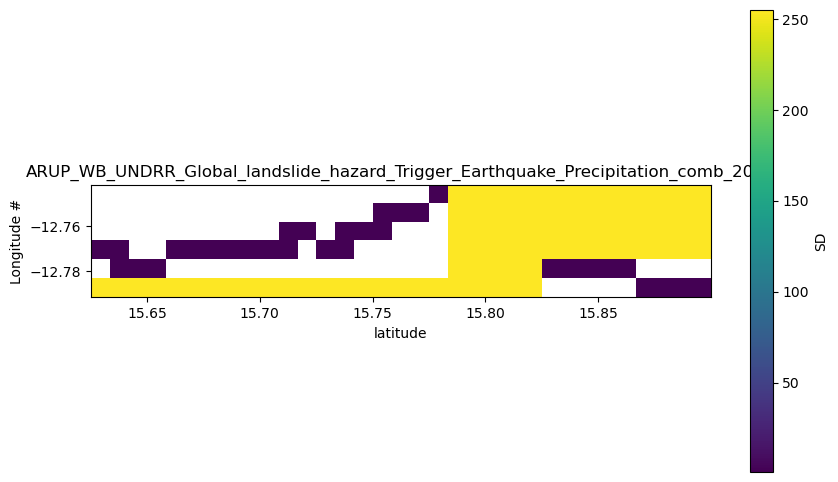

Ok


In [16]:
# Prepare the selected hazard model 
raster_landslide_region = Landsld.Download_and_Prepare_hazard_model(Selected_Landslide_model,gdf_shape_referential,Landsld.LANDSLIDE_HAZARD_MODELS_AVAILABLES[Selected_Landslide_model][0],
                                                            Landsld.Landslide_folder_hazard_to_save,
                                                            Landsld.LANDSLIDE_HAZARD_MODELS_AVAILABLES[Selected_Landslide_model][2])

### Exposure files

In [8]:
# Example usage
folder_path = "/root/WB/EIRA_tool/EIRA/eira/input_data/Angola/Infrastructure files/Huambo"  # Change to your folder path
geodataframes = EIRA_GIS_tools.extract_gdf_by_geometries_from_geofiles(folder_path)

# Print the dictionary of all GeoDataFrames
print("\nDictionary of all GeoDataFrames:")
for key, gdf in geodataframes.items():
    print(key)
#    print(f"GeoDataFrame: {gdf}")



Error processing Huambo — L 15kV Aérea Existe.shp: IllegalArgumentException: point array must contain 0 or >1 elements


Exposured file Read and Validated:
Huambo__90_pts_Type-point
Huambo — Linha 15kV (LA_110 planeada)_Type-linestring
Huambo — L15 kV Subterrâneo Existe_Type-linestring
Huambo — Linha 30kV LA_110_Type-linestring
Huambo — Linha 15kV LA_160 (planeada)_Type-linestring
Huambo — Linha 30kV LA 160_Type-linestring
Huambo — SE Existente_Type-point
Huambo — L 30kV Aérea Existente_Type-linestring

Dictionary of all GeoDataFrames:
Huambo__90_pts_Type-point
Huambo — Linha 15kV (LA_110 planeada)_Type-linestring
Huambo — L15 kV Subterrâneo Existe_Type-linestring
Huambo — Linha 30kV LA_110_Type-linestring
Huambo — Linha 15kV LA_160 (planeada)_Type-linestring
Huambo — Linha 30kV LA 160_Type-linestring
Huambo — SE Existente_Type-point
Huambo — L 30kV Aérea Existente_Type-linestring


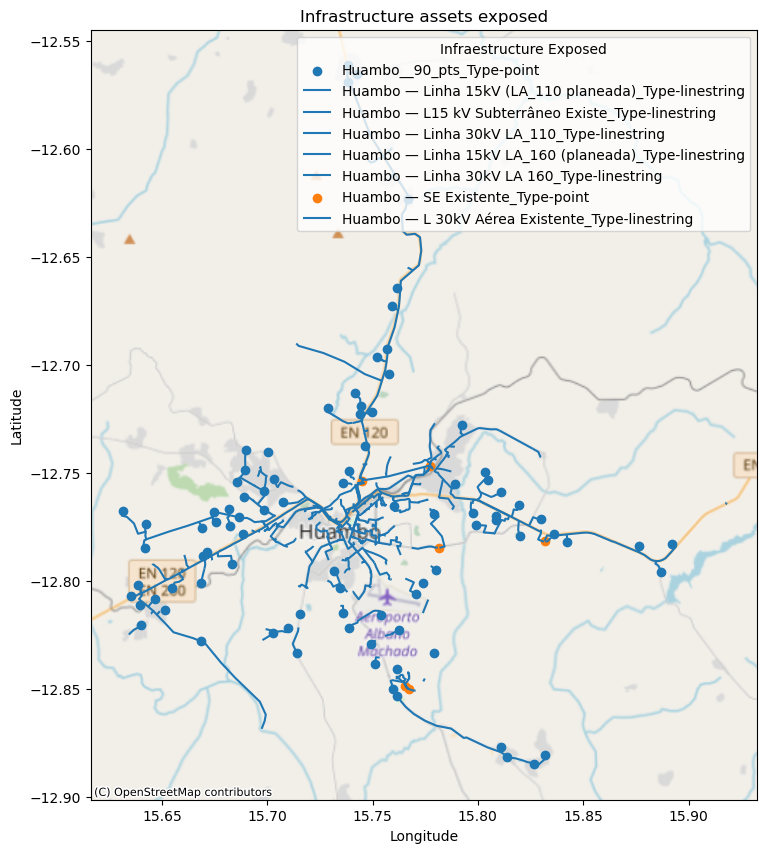

In [9]:
# plot all exposure files
#EIRA_GIS_tools.plot_and_read_geodataframes_exposed_with_basemap_from_folder_path(geodataframes)
EIRA_GIS_tools.plot_geodataframes_exposed_with_basemap_from_dic(geodataframes)

Original CRS: EPSG:4326
The file is already in EPSG:4326 (EPSG:4326) CRS.


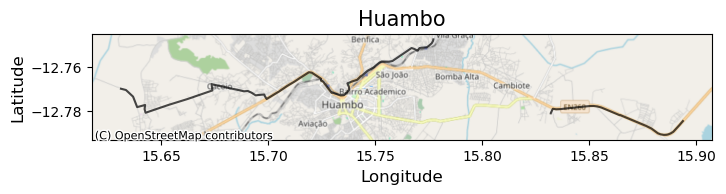

In [10]:
shape_file_path_ref = '/root/WB/EIRA_tool/EIRA/eira/input_data/Angola/Infrastructure files/Huambo/Huambo — Linha 30kV LA 160.shp'
gdf_shape_referential = EIRA_GIS_tools.read_and_reproject_vector_file(shape_file_path_ref)
EIRA_GIS_tools.plot_vectorGIS_in_memory_plus_basemap(gdf_shape_referential, "Huambo",use_basemap=True)

In [11]:
#Rutine to trim or slip a shape file (line geometry) in segment with a max length.  
outputfilepath='/root/WB/EIRA_tool/EIRA/eira/output_data/test2_segments.shp'
new_gdf=EIRA_GIS_tools.segment_lines(gdf_shape_referential,0.1,outputfilepath)
EIRA_GIS_tools.plot_vectorGIS_in_memory_plus_basemap(new_gdf, "New",use_basemap=True)
print(new_gdf['Length_km'])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

### READ AND PREPARE THE HAZARD

In [ ]:
shape_file_path_ref = '/root/WB/EIRA_tool/EIRA/eira/input_data/Angola/Huambo_shp/Huambo.shp'
#shape_file_path_ref = '/root/WB/EIRA_tool/EIRA/eira/input_data/CostaRica/gadm36_CRI_shp/SanJose_municipality.shp'
#shape_file_path_ref = '/root/WB/EIRA_tool/EIRA/eira/input_data/CostaRica/gadm36_CRI_shp/gadm36_CRI_0.shp'
#shape_file_path_ref = '/root/WB/EIRA_tool/EIRA/eira/input_data/Angola/Infrastructure files/Huambo/Huambo__90_pts.shp'

#Plot
gdf_shape_referential = EIRA_GIS_tools.read_and_reproject_vector_file(shape_file_path_ref)
EIRA_GIS_tools.plot_vectorGIS_in_memory_plus_basemap(gdf_shape_referential, "Huambo",use_basemap=True)

In [ ]:
Selected_Temperature_model= 'NEO_NASA_MOD_LSTD_November_2024'

Temp = EIRA_hazards.Temperature() 
# Prepare the selected hazard model 
Temp.Download_1_EQ_hazard_file(Selected_Temperature_model,Temp.TEMPERATURE_HAZARD_MODELS_AVAILABLES[Selected_Temperature_model][0],Temp.Temperature_folder_hazard_to_save)

# Step 4: Extra the hazard within affecting region under study
tif_Temperature_file_path=Temp.Temperature_folder_hazard_to_save + Selected_Temperature_model
outputfilepath='/root/WB/EIRA_tool/EIRA/eira/output_data/test1.tif'

raster_Temperature_region = Temp.extract_hazard_by_mask(Selected_Temperature_model,shape_file_path_ref,tif_Temperature_file_path,outputfilepath)


#EIRA_GIS_tools.plot_raster_and_shapefile(raster_Temperature_region,gdf_shape_referential)

### COMPUTE RISK

In [ ]:
# Prepare files to the computation
raster_region_to_gdf = EIRA_GIS_tools.raster_to_gdf_type_polygons(raster_Temperature_region)

gdf_risk_results = EIRA_GIS_tools.intersect_and_combine_attributes(raster_region_to_gdf,new_gdf)
#gdf_risk_results = EIRA_GIS_tools.extract_raster_values_to_gdf(raster_Temperature_region,new_gdf)
EIRA_GIS_tools.plot_vectorGIS_in_memory_plus_basemap(gdf_risk_results, "Risk",use_basemap=True)
EIRA_GIS_tools.plot_raster_in_memory_with_gdf_basemap(raster_Temperature_region,gdf_risk_results, adjust_window_plot_to="gdf",use_basemap=True)
#auxlis=[gdf_risk_results,raster_region_to_gdf]
#EIRA_GIS_tools.plot_geodataframes(auxlis)
#print(gdf_risk_results)

In [ ]:
#Generate the histogram
#frequency_table = EIRA_GIS_tools.analyze_gdf_column(gdf_risk_results,plot_title_name='Histogram',plot_x_axis_name='pixel values') 
frequency_table = EIRA_GIS_tools.analyze_geodataframe_risk_line_type(gdf_risk_results,bins=3,plot_title_name='Histogram',plot_x_axis_name='pixel values')
print (frequency_table)

In [ ]:
# Prepare files to the computation
#raster_region_to_gdf = EIRA_GIS_tools.raster_to_gdf_type_polygons(raster_Temperature_region)

#compute the risk 
#frequency_table = EIRA_risk_tools_level1.perfom_risk_analysis_level1_TypeLines(raster_region_to_gdf,new_gdf)
#frequency_table = EIRA_risk_tools_level1.perfom_risk_analysis_level1_TypeLines(raster_Temperature_region,new_gdf)

#aux_dic  = {"archivo_prueba_Type-linestring":new_gdf}
#results = EIRA_risk_tools_level1.perfom_EIRA_risk_analysis_level1(geodataframes,raster_Temperature_region, "Drought", "Cumulated SD")


### Example for reviewing when part of the infraestructure is not affected

In [ ]:
shape_file_path_ref = '/root/WB/EIRA_tool/EIRA/eira/input_data/Angola/Huambo_shp/Huambo.shp'
#shape_file_path_ref = '/root/WB/EIRA_tool/EIRA/eira/input_data/CostaRica/gadm36_CRI_shp/SanJose_municipality.shp'
#shape_file_path_ref = '/root/WB/EIRA_tool/EIRA/eira/input_data/CostaRica/gadm36_CRI_shp/gadm36_CRI_0.shp'
#shape_file_path_ref = '/root/WB/EIRA_tool/EIRA/eira/input_data/Angola/Infrastructure files/Huambo/Huambo__90_pts.shp'

#Plot
gdf_shape_referential = EIRA_GIS_tools.read_and_reproject_vector_file(shape_file_path_ref)
EIRA_GIS_tools.plot_vectorGIS_in_memory_plus_basemap(gdf_shape_referential, "Huambo",use_basemap=True)

In [ ]:
Selected_Drought_model= 'GIRI Drought hazard SMA 25-year return period - Existing climate'

drg = EIRA_hazards.Droughts() 

# Prepare the selected hazard model 
drg.Download_1_EQ_hazard_file(Selected_Drought_model,drg.DROUGHT_HAZARD_MODELS_AVAILABLES[Selected_Drought_model][0],drg.Drought_folder_hazard_to_save)

# Extra the hazard within affecting region under study
tif_drought_file_path=drg.Drought_folder_hazard_to_save + Selected_Drought_model
outputfilepath='/root/WB/EIRA_tool/EIRA/eira/output_data/test1Drought.tif'
raster_drought_region = drg.extract_hazard_by_mask_2(Selected_Drought_model,gdf_shape_referential,
                                                     tif_drought_file_path,drg.DROUGHT_HAZARD_MODELS_AVAILABLES[Selected_Drought_model][2],outputfilepath)


In [ ]:
#Example of a point shape file
exposureFile = '/root/WB/EIRA_tool/EIRA/eira/input_data/Angola/Infrastructure files/Huambo/Huambo__90_pts.shp'

#Plot
new_gdf = EIRA_GIS_tools.read_and_reproject_vector_file(exposureFile)
EIRA_GIS_tools.plot_vectorGIS_in_memory_plus_basemap(new_gdf, "Point example",use_basemap=True)

In [ ]:
#Risk analysis

# Prepare files to the computation
gdf_polygon_raster_hazard_region = EIRA_GIS_tools.raster_to_gdf_type_polygons(raster_drought_region)

outputfilepath='/root/WB/EIRA_tool/EIRA/eira/output_data/testPointsLeon'
gdf_risk_results = EIRA_GIS_tools.intersect_and_combine_attributes(gdf_polygon_raster_hazard_region,new_gdf,outputfilepath)
EIRA_GIS_tools.plot_raster_in_memory_with_gdf_basemap(raster_drought_region,gdf_risk_results,
                                                          title="Risk results for the exposed infraestructure",
                                                          adjust_window_plot_to="gdf",use_basemap=False)

In [ ]:
#Risk Analysis
result_histogram = EIRA_GIS_tools.analyze_geodataframe_risk_point_type(gdf_risk_results)